<a href="https://colab.research.google.com/github/tomcat472/ML_on_GIS/blob/main/ML_on_GIS_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ပထမဆုံးအနေနဲ့ပြောချင်တာက python ရရမယ်။ ပြီးရင် gis concept နည်းနည်းပါးပါးသိရမယ်။
# အဲ့တာပြီးမှ python ရဲ့ library ဖြစ်တဲ့ pandas, numpy, matplotlib, seaborn နဲ့ scikit learn ကိုလဲ သိမှ အဆင်ပြေမှာဖြစ်ပါတယ်။

In [2]:
# ပထမဆုံး ကိုယ့်ဆီမှာရှိတဲ့ data set တွေကို ခေါ်တင်ပါမယ်။
# အဲ့လိုခေါ်တင်ဖို့အတွက် google drive နဲ့အရင် link ချိတ်ရပါမယ်။

In [3]:
# google drive နှင့်လင့်ချိတ်ခြင်း
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# လိုအပ်တဲ့ library များအား import လုပ်ခြင်း
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [6]:
# ကိုယ့်ရဲ့ shp file အား ပထမဆုံး drive ပေါ်မှာ upload လုပ်ဖို့တော့လိုပါတယ်။
# gpd က pandas နဲ့သဘောတရားတူပါတယ်။
# ကျန်တဲ့ kml, json, csv file type တွေကိုလဲ သုံးလို့ရပါတယ်။
shp_file=gpd.read_file('/content/drive/MyDrive/Shape File/mmr_polbnda_250k_adm3_mimu.shp')
shp_file.head()

,OBJECTID,ST,ST_PCODE,DT,DT_PCODE,TS,TS_PCODE,SELF_ADMIN,ST_RG,TS_MMR4,geometry
0,313.0,Rakhine,MMR012,Kyaukpyu,MMR012D003,Ramree,MMR012013,None,State,áááºá¸áá¼á²,"MULTIPOLYGON (((93.99586 18.74753, 93.99853 18..."
1,292.0,Rakhine,MMR012,Thandwe,MMR012D004,Toungup,MMR012016,None,State,áá±á¬ááºáá¯ááº,"MULTIPOLYGON (((94.04611 19.02329, 94.04125 19..."
2,314.0,Rakhine,MMR012,Kyaukpyu,MMR012D003,Kyaukpyu,MMR012011,None,State,áá»á±á¬ááºáá¼á°,"MULTIPOLYGON (((93.83290 19.25509, 93.82447 19..."
3,324.0,Ayeyarwady,MMR017,Labutta,MMR017D004,Labutta,MMR017016,None,Region,ááá½áá¹áá¬,"MULTIPOLYGON (((95.06350 15.81486, 95.05964 15..."
4,280.0,Ayeyarwady,MMR017,Pathein,MMR017D001,Ngapudaw,MMR017004,None,Region,ááá¯áá±á¬,"MULTIPOLYGON (((94.27572 15.85924, 94.27520 15..."


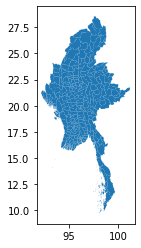

In [7]:
# shp file ရဲ့ ပုံအား ကြည့်ခြင်း
shp_file.plot()

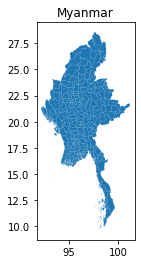

In [8]:
# plot လုပ်ထားတဲ့ file တွေမှာ ခေါင်းစဉ်တွေ၊ label တွေတပ်တဲ့ ပုံစံက matplotlib ကအတိုင်းဖြစ်ပါတယ်။
shp_file.plot()
plt.title('Myanmar')
plt.show()

In [9]:
# geopandas ရဲ့ built-in datasets များအား အသုံးပြုခြင်း
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


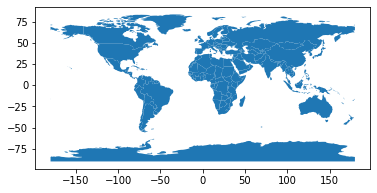

In [10]:
world.plot()

In [11]:
# function များတည်ဆောက်ပြီးလဲ နိုင်ငံအလိုက် area များအားလည်း တွက်ထုတ်လို့ရပါတယ်။
world['area']=world['geometry'].apply(lambda x:x.area)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.639511
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",76.301964
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",8.603984
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1712.995228
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1122.281921


In [12]:
# ဒါဆိုရင် area column တခုတိုးလာပြီ ဖြစ်ပါတယ်။
# values အလိုက် sort လုပ်ပြီး area အများဆုံးဖြစ်တဲ့ နိုင်ငံ (၁၅)နိုင်ငံကို ထုတ်ရအောင်။
world.sort_values(by='area',ascending=False).head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
159,4050,Antarctica,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",6028.836194
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ...",2935.205205
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1712.995228
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1122.281921
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",954.635341
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",710.185243
137,23232413,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",695.545501
22,57713,North America,Greenland,GRL,2173.0,"POLYGON ((-46.76379 82.62796, -43.40644 83.225...",677.509565
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",330.586822
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",278.923392


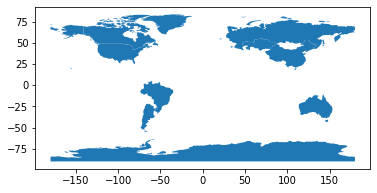

In [13]:
# ပြီးတော့ အထက်ပါနိုင်ငံတွေကို plot လုပ်ပြီးကြည့်ရအောင်
world.sort_values(by='area',ascending=False).head(10).plot()
# ပုံကိုကြည့်လိုက်တော့ အန္တာတိကတိုက်က ပိုနေတယ်။ အဲ့ဒီနေရာကို ဘယ်လိုဖယ်ရမှာလဲဆိုတာနဲ့
# ကိုယ့် data ထဲက မလိုတဲ့အစိတ်အပိုင်းတွေကို ဘယ်လို cleaning လုပ်ရမှာလဲဆိုတာကို နောက်ပိုင်းရှင်းပြပါမယ်။

In [14]:
# area လိုပဲ length ကိုလဲရှာလို့ရပါတယ်။
world['length']=world['geometry'].apply(lambda x:x.length)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area,length
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.639511,8.991010
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",76.301964,37.260671
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",8.603984,27.662143
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1712.995228,916.062855
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1122.281921,356.977119


In [15]:
# raster data တွေကို import လုပ်ခြင်း
# ပထမဆုံးအနေနဲ့ rasterio ကို install လုပ်ရမှာဖြစ်ပါတယ်။
# raster file တွေကျတော့ image file အမျိုးအစားဖြစ်ပြီး သူ့တန်ဖိုးတွေကို ဖော်ပြရင် matrix နဲ့ဖော်ပြပါတယ်။

In [16]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


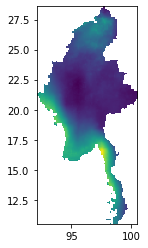

In [17]:
import rasterio
from rasterio.plot import show
mm_rainfall=r'/content/drive/MyDrive/Shape File/GIOVANNI-g4.timeAvgMap.GPM_3IMERGM_06_precipitation.20190101-20191231.91E_10N_100E_28N.tif'
img=rasterio.open(mm_rainfall)
show(img);

In [18]:
matrix=img.read()
matrix

array([[[-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        ...,
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9]]],
      dtype=float32)

In [19]:
# (23-8-2022)